# Principal Component Analysis: Application

### Using PCA to reduce dimension to visualize
If there are a large number of variables or dimensions along which the data is distributed, which is common in real world , visualization can be a challenge and almost impossible. Hence, PCA can do that for you since it projects the data into a lower dimension, thereby allowing you to visualize the data in a 2D or 3D space with a naked eye.


## 784 dimension data to 2 dimension

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np

X, y = fetch_openml('mnist_784', version=1, 
                    return_X_y=True, as_frame=False)

print(X.shape) # has 784 dimension

(70000, 784)


In [22]:
# Lets see 1st data
np.set_printoptions(linewidth=115)
print(X[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

In [23]:
# Create PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# lets print 1st data
print(X_pca[0])

[ 122.2579148  -316.22756683]


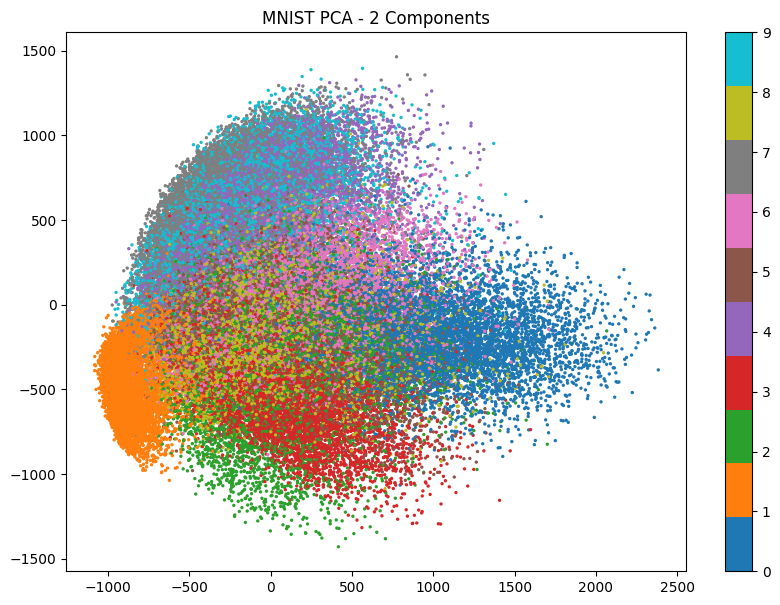

In [24]:
# Plot 2D scatter
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y.astype(int),
            cmap='tab10', s=2)
plt.colorbar()
plt.title("MNIST PCA - 2 Components")
plt.show()

It is somewhat easier to see the 10 different digits.

## 3 dimension  data to 2 dimension

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA

# Generate dataset
X, color = make_swiss_roll(n_samples=2000, noise=0.2)
print(X.shape) # 3 dimension data

(2000, 3)


In [16]:
# Lets see 1st data
print(X[0])

[-7.98082928  8.9776907   3.82050444]


In [17]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# lets print 1st data
print(X_pca[0])

[-2.80992533 -9.52938414]


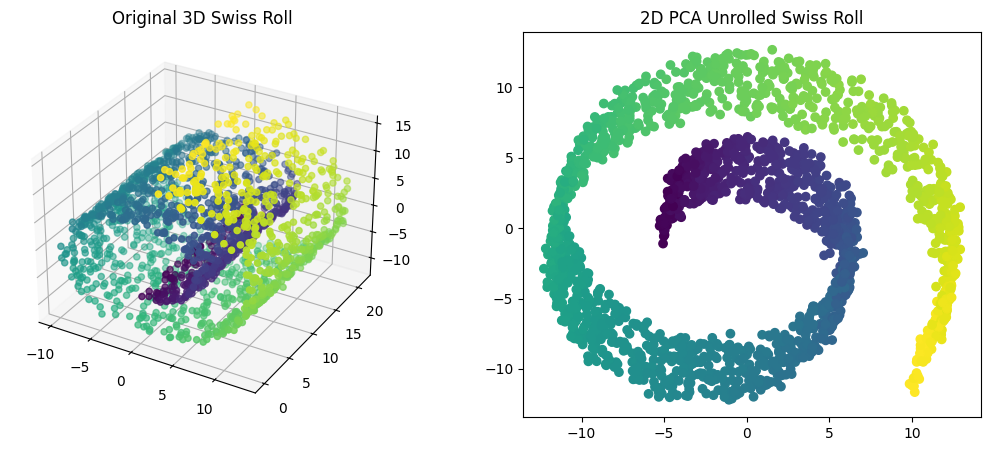

In [18]:
# Plot original 3D Swiss Roll
fig = plt.figure(figsize=(13, 5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=color, cmap='viridis')
ax.set_title("Original 3D Swiss Roll")

# Plot 2D PCA visualization
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=color, cmap='viridis')
plt.title("2D PCA Unrolled Swiss Roll")

plt.show()


This is what the data looks like in 3D: complex and curled.


After PCA, it becomes 2D: flattened and easy to understand.

## 4 dimension to 2 dimension

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load Iris dataset
iris = load_iris()
X = iris.data            # (150, 4)
y = iris.target          # class labels
labels = iris.target_names  # class names

print(X.shape)

(150, 4)


In [26]:
# Lets see 1st data
print(X[0])

[5.1 3.5 1.4 0.2]


In [27]:
# Apply PCA → reduce 4D → 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# lets print 1st data
print(X_pca[0])

[-2.68412563  0.31939725]


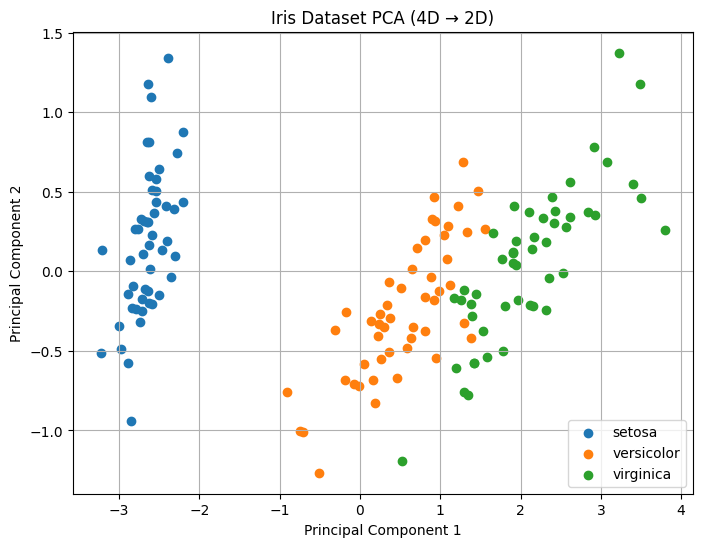

In [28]:
# Plot
plt.figure(figsize=(8, 6))
for i, label in enumerate(labels):
    plt.scatter(
        X_pca[y == i, 0], 
        X_pca[y == i, 1], 
        label=label
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Iris Dataset PCA (4D → 2D)")
plt.legend()
plt.grid(True)
plt.show()